In [1]:
from andorCodes import AndorCodes
import andor

In [2]:
andor.initialize_ctypes()
andor.initialize_sdk()
print("Initialised SDK")
andor.choose_camera(0) # first
print("Set current camera to be #0 (first)")
andor.free_internal_memory()
ccd_height, ccd_width=andor.detector_size()
print(f"Size of detector is {ccd_height}x{ccd_width}")

Initialised SDK
Set current camera to be #0 (first)
Size of detector is 1024x1024


In [3]:
## detector configuration parameters
#
hbinning,vbinning=(1,1) # horizontal then vertical
region_lrbt=1,1000,500,1000
region=andor.Region(hbinning,vbinning,region_lrbt[0],region_lrbt[1],region_lrbt[2],region_lrbt[3])
exposure_time=0.1 # [s]

In [4]:
print(f"Shutter {'is' if andor.get_shutter_info() else 'is not'} available")
ttl_high=True
shutter_mode='Open'
open_time,close_time=0,0
andor.set_shutter(shutter_mode,ttl_high,open_time,close_time)
print(f"Shutter set to TTL o/p {'high' if ttl_high else 'low'}")
print(f"Shutter mode is '{shutter_mode}'")
print(f"Shutter open/close time is {open_time}/{close_time}ms")

trigger_mode='Internal'
andor.set_trigger(trigger_mode)
print(f"Tigger mode is '{trigger_mode}'")

# No need to do this, the default it seems
acq_mode='Single'
andor.set_acquisition(acq_mode)
print(f"Acquisition mode is '{acq_mode}'")

read_mode='Image'
andor.set_read(read_mode)
print(f"Read mode is '{read_mode}'")

andor.set_exposure(exposure_time)
print(f"Exposure time is {1e3*exposure_time:.1f}ms")

andor.set_region(region)
print(f"Binning HxV is {hbinning}x{vbinning}")
print("ROI is (L,R,B,T)={0[0]}->{0[1]},{0[2]}=>{0[3]}".format(region_lrbt))

times=andor.get_timing()
print(f"Exposure time is {1e3*times[0]:.1f}ms and acquisition time is {1e3*times[1]:.1f}ms")

Shutter is available
Shutter set to TTL o/p high
Shutter mode is 'Open'
Shutter open/close time is 0/0ms
Tigger mode is 'Internal'
Acquisition mode is 'Single'
Read mode is 'Image'
Exposure time is 100.0ms
Binning HxV is 1x1
ROI is (L,R,B,T)=1->1000,500=>1000
Exposure time is 100.0ms and acquisition time is 136.4ms


In [5]:
print(f"Number images in SDK now={andor.get_total_number_images_acquired()}")

## start acq.
#
andor.start_acquisition()

import ctypes
def wait_for_acquisition():
    acquiring=True
    while acquiring:
        print("Waiting for end of acquisition")
        andor.wait_for_acquisition()
        if andor.last_ret_code==AndorCodes.DRV_NO_NEW_DATA:
            andor.abort_acquisition()
            print(f"Acquisition ended without data {AndorCodes.values[andor.last_ret_code]}")
            acquiring=False
        else:
            acc,kin=andor.get_acquisition_progress()
            if acc==0 and kin==0:
                print("Acquisition end")
            stat=andor.get_status()
            acquiring=(stat==AndorCodes.DRV_ACQUIRING)
    print(f"Acquisition completed")

wait_for_acquisition()
stat=andor.get_status()
print(f"Status is {AndorCodes.values[stat]}")
print(f"Number images in SDK now={andor.get_total_number_images_acquired()}")

Number images in SDK now=0
Waiting for end of acquisition
Acquisition end
Acquisition completed
Status is DRV_IDLE
Number images in SDK now=1


In [6]:
print("First/last image index={0[0]}/{0[1]}".format(andor.get_number_available_images()))
data=andor.get_acquired_data()
print(f"Got the acquired data, length={data.shape}")

First/last image index=1/1
Got the acquired data, length=(501, 1000)


Populating the interactive namespace from numpy and matplotlib


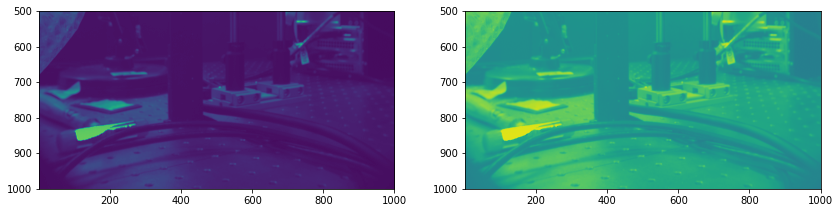

In [7]:
%pylab inline
extent=list(region_lrbt)[0:2]+list(region_lrbt[2:4][::-1])
fig1=pylab.figure(figsize=(14,data.shape[1]/data.shape[0]*8))
sps1=fig1.subplots(1,2)
sps1[0].imshow(data,aspect='1',extent=extent)
sps1[1].imshow(numpy.ma.masked_array(numpy.log10(data),data==0),aspect='1',extent=extent)

Next call is lazy way to get the data off the camera head without needing to go via `numpy`

In [8]:
ret_code=andor.SaveAsBmp(b"./image.bmp", b"./GREY.PAL", 0, 0)
print(f"Got {ret_code}/{AndorCodes.values[ret_code]}")

AttributeError: module 'andor' has no attribute 'andor'

---

In [9]:
status=andor.get_status()
print(f"Status is: {status}={AndorCodes.values[status]}")

Status is: 20073=DRV_IDLE


---

In [10]:
andor.shutdown()

True